In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import domojupyter as domo
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

df = domo.read_dataframe('VwCollegeHouseFloorplanLeasingAndRatesforAnalysis', query='SELECT * FROM table')

df['year'] = df['asofdate'].dt.year
df['month'] = df['asofdate'].dt.month
df['day'] = df['asofdate'].dt.day
df['semester'] = df['month'].apply(lambda x: 'Spring' if x < 6 else ('Summer' if x < 9 else 'Fall'))
df['daysleftinschoolyear'] = (df['academicyearenddate'] - df['asofdate']).dt.days
df['dayspassedinschoolyear'] = (df['asofdate'] - df['academicyearenddate']).dt.days


region_mapping = df['region'].astype('category').cat.categories
state_mapping = df['state'].astype('category').cat.categories
city_mapping = df['city'].astype('category').cat.categories
college_mapping = df['college'].astype('category').cat.categories
community_mapping = df['subjectcommunity'].astype('category').cat.categories
semester_mapping = df['semester'].astype('category').cat.categories
floorplan_mapping = df['floorplanname'].astype('category').cat.categories


df['region'] = df['region'].astype('category').cat.codes
df['state'] = df['state'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['college'] = df['college'].astype('category').cat.codes
df['subjectcommunity'] = df['subjectcommunity'].astype('category').cat.codes
df['semester'] = df['semester'].astype('category').cat.codes
df['floorplanname'] = df['floorplanname'].astype('category').cat.codes


df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop(['asofdate', 'academicyearbegindate', 'academicyearenddate'], axis=1)

In [15]:
expanded_rows = []

for _, row in df_cleaned.iterrows():
    min_rate = row['minmarketrate']
    max_rate = row['maxmarketrate']
    if max_rate > min_rate:
        rate_step = (max_rate - min_rate) * 0.01
        for rate in np.arange(min_rate, max_rate, rate_step):
            new_row = row.copy()
            new_row['subjectrate_option'] = rate
            expanded_rows.append(new_row)
    else:

        new_row = row.copy()
        new_row['subjectrate_option'] = min_rate
        expanded_rows.append(new_row)

df_expanded = pd.DataFrame(expanded_rows)

pd.set_option('display.max_columns', None)

df_expanded.head(20)

,college,weeksleftinacademicyear,collegeoncampushousing,collegeoffcampushousing,region,state,city,subjectcommunity,totalsubjectcommunitybeds,target occupancy,target rent revenue,ytdsignedrent,beds,floorplanname,marketproximity,marketvintage,marketsqft,marketrate,weeklymarketratechange,yearlymarketratechange,minmarketrate,maxmarketrate,marketprelease,weeklymarketpreleasechange,yearlymarketpreleasechange,yearlymarketoccupancychange,marketoccupancy,subjectproximity,subjectaskingrate,weeklysubjectaskingratechange,subjectnewleaserate,subjectweeklynewleases,weeklysubjectnewleaseratechange,subjectvintage,totalsubjectbeds,subjectprelease,weeklysubjectpreleasechange,weeklysubjectnewleasechange,weeklyleads,sustainablenewleasecount,year,month,day,semester,daysleftinschoolyear,dayspassedinschoolyear,subjectrate_option
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1050.00
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1059.49
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1068.98
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1078.47
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1087.96
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1097.45
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1106.94
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1116.43
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1125.92
5,15,22,0.36,0.64,2,6,2,89,1215,0.951638,1213351.0,57350.0,4,450,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,2024,4,15,1,153,-153,1135.41


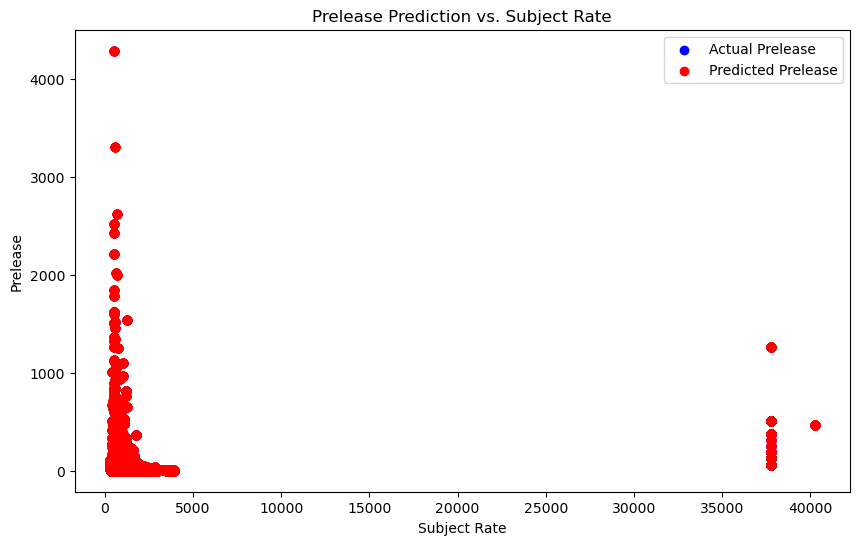

In [16]:
X = df_expanded.drop(['subjectweeklynewleases'], axis=1)
y = df_expanded['subjectweeklynewleases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test['subjectnewleaserate'], y_test, color='blue', label='Actual Prelease')
plt.scatter(X_test['subjectnewleaserate'], predictions, color='red', label='Predicted Prelease')
plt.xlabel('Subject Rate')
plt.ylabel('Prelease')
plt.title('Prelease Prediction vs. Subject Rate')
plt.legend()
plt.show()


In [17]:
# Now, making predictions should work without issues
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.21785027234223564
R-squared: 0.9999864896213962


In [18]:
# Convert predictions to a DataFrame
preds_df = pd.DataFrame(y_pred, columns=['Predicted Prelease'], index=X_test.index)

# If y_test is not a DataFrame, convert it to one; otherwise, ensure it matches the index
y_test_df = pd.DataFrame(y_test).rename(columns={y_test.name: 'Actual Prelease'})

# Combine the features, actual rates, and predictions
results_df = pd.concat([X_test, y_test_df, preds_df], axis=1)

# Set the pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Now, when you use the head() function, all columns will be displayed
results_df.head(20)

,college,weeksleftinacademicyear,collegeoncampushousing,collegeoffcampushousing,region,state,city,subjectcommunity,totalsubjectcommunitybeds,target occupancy,target rent revenue,ytdsignedrent,beds,floorplanname,marketproximity,marketvintage,marketsqft,marketrate,weeklymarketratechange,yearlymarketratechange,minmarketrate,maxmarketrate,marketprelease,weeklymarketpreleasechange,yearlymarketpreleasechange,yearlymarketoccupancychange,marketoccupancy,subjectproximity,subjectaskingrate,weeklysubjectaskingratechange,subjectnewleaserate,weeklysubjectnewleaseratechange,subjectvintage,totalsubjectbeds,subjectprelease,weeklysubjectpreleasechange,weeklysubjectnewleasechange,weeklyleads,sustainablenewleasecount,year,month,day,semester,daysleftinschoolyear,dayspassedinschoolyear,subjectrate_option,Actual Prelease,Predicted Prelease
21034,51,5,0.21,0.79,2,6,7,88,568,0.776887,312062.00,41863.00,3,311,1.39000,2012,1218,624.230769,0.000000,0.000000,510.0,675.0,0.99361,0.00000,0.13463,-0.04493,0.92945,1.02,595.0,0.0,659.000000,20.000000,2010,576,0.9306,0.00000,2,8,33,2023,8,14,2,34,-34,562.80,8,8.0
1758,1,31,0.17,0.83,3,2,46,49,639,0.971085,691586.35,27145.00,4,472,0.63701,2015,1253,1250.292279,0.000000,36.080253,689.0,3125.0,0.57506,0.00000,0.17533,0.00010,0.99187,1.47,995.0,0.0,925.000000,0.000000,2010,44,0.6364,0.00000,0,1,42,2024,2,12,1,216,-216,1371.08,6,6.0
9506,25,24,0.15,0.85,4,18,16,74,221,0.978111,219261.43,11338.00,4,493,0.73115,2015,1574,1013.512063,-32.099278,-0.166465,779.0,1205.0,0.87802,0.00144,0.21560,-0.00019,0.99496,0.53,1070.0,0.0,1070.000000,0.000000,2013,24,0.9167,0.33340,2,2,8,2024,4,1,1,167,-167,791.78,6,6.0
28191,22,24,0.26,0.74,2,12,40,77,600,0.971667,482874.81,46606.00,2,173,0.74971,2013,654,899.650761,-91.810188,-109.771673,625.0,1295.0,0.56714,-0.38445,-0.04081,0.02252,0.99745,2.40,850.0,0.0,860.000000,0.000000,1996,1476,0.4423,0.10080,33,9,109,2023,4,3,1,167,-167,1067.20,45,45.0
7052,45,51,0.18,0.82,2,0,34,9,1008,0.859085,562734.42,0.00,2,240,0.84500,2014,891,764.384615,10.733453,14.769231,709.0,799.0,0.00000,0.00000,-0.53846,-0.26923,0.61538,0.56,639.0,0.0,544.500000,0.000000,2007,472,0.0000,0.00000,-52,2,133,2023,9,25,0,356,-356,719.80,52,52.0
15836,26,6,0.29,0.71,1,19,45,54,250,0.980960,250557.06,83525.00,2,129,2.56848,2004,689,1150.501834,0.000000,6.557643,523.0,2280.0,0.98622,0.00000,0.02252,-0.56278,0.34663,2.28,880.0,0.0,870.000000,0.000000,2000,552,1.0000,0.00000,0,6,57,2023,8,7,2,41,-41,1366.36,72,72.0
207,24,23,0.24,0.76,0,16,15,85,392,0.935971,462903.00,1899.00,1,87,1.57145,2017,445,1298.818587,0.000000,122.398818,831.0,2579.0,0.56675,0.00000,0.27920,0.01533,0.96653,2.10,1889.0,0.0,1835.000000,0.000000,2023,4,0.5000,0.00000,0,2,2,2024,4,8,1,160,-160,865.96,2,2.0
13536,39,43,0.19,0.81,0,10,14,23,1063,0.952358,832570.29,39000.00,4,425,1.06275,2014,1351,746.650257,0.000000,149.761124,510.0,1119.0,0.42465,0.00000,0.13906,0.04270,0.91132,0.90,695.0,0.0,695.000000,0.000000,2010,128,0.8906,0.00000,1,2,3,2023,11,20,0,300,-300,729.24,2,2.0
11630,16,34,0.29,0.71,0,9,0,7,904,0.981481,598888.41,144130.00,4,396,0.94416,2009,1624,552.642857,0.779221,-456.850649,499.0,660.0,0.60174,0.03554,-0.13484,-0.11648,0.81900,0.97,630.0,0.0,630.000000,0.000000,2006,3040,0.6447,0.02235,-16,8,217,2024,1,22,1,237,-237,610.09,24,24.0
7991,53,51,0.28,0.71,2,6,50,64,584,0.759008,337224.28,0.00,2,132,1.37000,1970,936,497.757009,0.000000,-74.284875,473.0,558.0,0.00000,0.00000,-0.53765,-0.04813,0.92307,2.56,629.0,0.0,1100.750000,0.000000,2011,896,0.0000,0.00000,0,7,61,2023,9,25,0,356,-356,517.20,56,56.0


In [19]:
# Creating mappings
region_dict = {i: category for i, category in enumerate(region_mapping)}
state_dict = {i: category for i, category in enumerate(state_mapping)}
city_dict = {i: category for i, category in enumerate(city_mapping)}
community_dict = {i: category for i, category in enumerate(community_mapping)}
college_dict = {i: category for i, category in enumerate(college_mapping)}
semester_dict = {i: category for i, category in enumerate(semester_mapping)}
floorplan_dict = {i: category for i, category in enumerate(floorplan_mapping)}

# Example of ensuring unique names by using suffixes parameter correctly
merged_df = df_cleaned.merge(results_df, left_index=True, right_index=True, how='inner', suffixes=('_cleaned', '_results'))

# Applying the mappings to revert to original categories
merged_df['region_cleaned'] = merged_df['region_cleaned'].map(region_dict)
merged_df['state_cleaned'] = merged_df['state_cleaned'].map(state_dict)
merged_df['city_cleaned'] = merged_df['city_cleaned'].map(city_dict)
merged_df['subjectcommunity_cleaned'] = merged_df['subjectcommunity_cleaned'].map(community_dict)
merged_df['college_cleaned'] = merged_df['college_cleaned'].map(college_dict)
merged_df['semester_cleaned'] = merged_df['semester_cleaned'].map(semester_dict)
merged_df['floorplanname_cleaned'] = merged_df['floorplanname_cleaned'].map(floorplan_dict)


# Ensure no suffixes in column names, if you haven't already done this step
merged_df.columns = merged_df.columns.map(lambda x: x.replace('_cleaned', '').replace('_results', ''))

# Create a new DataFrame to store the cleaned data
cleaned_df = pd.DataFrame(index=merged_df.index)

# Iterate through each unique column name
for col in merged_df.columns.unique():
    col_data = merged_df.loc[:, col]
    # Check if 'col_data' is a DataFrame or Series by trying to access its shape
    try:
        # This will succeed if 'col_data' is a DataFrame (i.e., there are duplicate columns)
        if col_data.shape[1] > 1:
            # Handle duplicate columns, preferring non-null values from later ones as example
            cleaned_df[col] = col_data.bfill(axis=1).iloc[:, 0]
    except IndexError:
        # This block executes if 'col_data' is a Series, meaning the column is unique
        cleaned_df[col] = col_data

cleaned_df['date'] = pd.to_datetime(cleaned_df[['year', 'month', 'day']])

cleaned_df.drop(['year', 'month', 'day'], axis=1, inplace=True)
        
cleaned_df.head()

,college,weeksleftinacademicyear,collegeoncampushousing,collegeoffcampushousing,region,state,city,subjectcommunity,totalsubjectcommunitybeds,target occupancy,target rent revenue,ytdsignedrent,beds,floorplanname,marketproximity,marketvintage,marketsqft,marketrate,weeklymarketratechange,yearlymarketratechange,minmarketrate,maxmarketrate,marketprelease,weeklymarketpreleasechange,yearlymarketpreleasechange,yearlymarketoccupancychange,marketoccupancy,subjectproximity,subjectaskingrate,weeklysubjectaskingratechange,subjectnewleaserate,subjectweeklynewleases,weeklysubjectnewleaseratechange,subjectvintage,totalsubjectbeds,subjectprelease,weeklysubjectpreleasechange,weeklysubjectnewleasechange,weeklyleads,sustainablenewleasecount,semester,daysleftinschoolyear,dayspassedinschoolyear,subjectrate_option,Actual Prelease,Predicted Prelease,date
5,Georgia Institute of Technology,22,0.36,0.64,Southeast,ga,atlanta,Westmar Student Lofts,1215,0.951638,1213351.0,57350.0,4,4BR/4BA - Elite,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,Spring,153,-153,1344.19,14,14.0,2024-04-15
5,Georgia Institute of Technology,22,0.36,0.64,Southeast,ga,atlanta,Westmar Student Lofts,1215,0.951638,1213351.0,57350.0,4,4BR/4BA - Elite,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,Spring,153,-153,1543.48,14,14.0,2024-04-15
5,Georgia Institute of Technology,22,0.36,0.64,Southeast,ga,atlanta,Westmar Student Lofts,1215,0.951638,1213351.0,57350.0,4,4BR/4BA - Elite,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,Spring,153,-153,1790.22,14,14.0,2024-04-15
5,Georgia Institute of Technology,22,0.36,0.64,Southeast,ga,atlanta,Westmar Student Lofts,1215,0.951638,1213351.0,57350.0,4,4BR/4BA - Elite,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,Spring,153,-153,1220.82,14,14.0,2024-04-15
5,Georgia Institute of Technology,22,0.36,0.64,Southeast,ga,atlanta,Westmar Student Lofts,1215,0.951638,1213351.0,57350.0,4,4BR/4BA - Elite,0.53049,2018,1362,1367.755508,0.0,-1.788629,1050.0,1999.0,0.63883,0.0,-0.03837,-0.01052,0.94881,0.98,924.0,0.0,924.0,14,0.0,2005,3024,0.1528,0.0,0,7,188,Spring,153,-153,1116.43,14,14.0,2024-04-15


In [20]:
domo.write_dataframe(cleaned_df, 'PriceElasticityTimeseries')

/home/domo/.conda/lib/python3.9/site-packages/domojupyter/io.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  columns = [{'name': column, 'type': _convert_type(df.dtypes[ind].name)} for ind, column in enumerate(df.columns)]
/home/domo/.conda/lib/python3.9/site-packages/domojupyter/io.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  columns = [{'name': column, 'type': _convert_type(df.dtypes[ind].name)} for ind, column in enumerate(df.columns)]
/home/domo/.conda/lib/python3.9/site-packages/domojupyter/io.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

In [21]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor

model = LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=100)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Average MSE: {-scores.mean()}, Standard Deviation: {scores.std()}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6469
[LightGBM] [Info] Number of data points in the train set: 865088, number of used features: 46
[LightGBM] [Info] Start training from score 48.171092
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6461
[LightGBM] [Info] Number of data points in the train set: 865088, number of used features: 46
[LightGBM] [Info] Start training from score 45.475412
[LightGBM] [Warning] Fou

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6478
[LightGBM] [Info] Number of data points in the train set: 865088, number of used features: 46
[LightGBM] [Info] Start training from score 48.520273


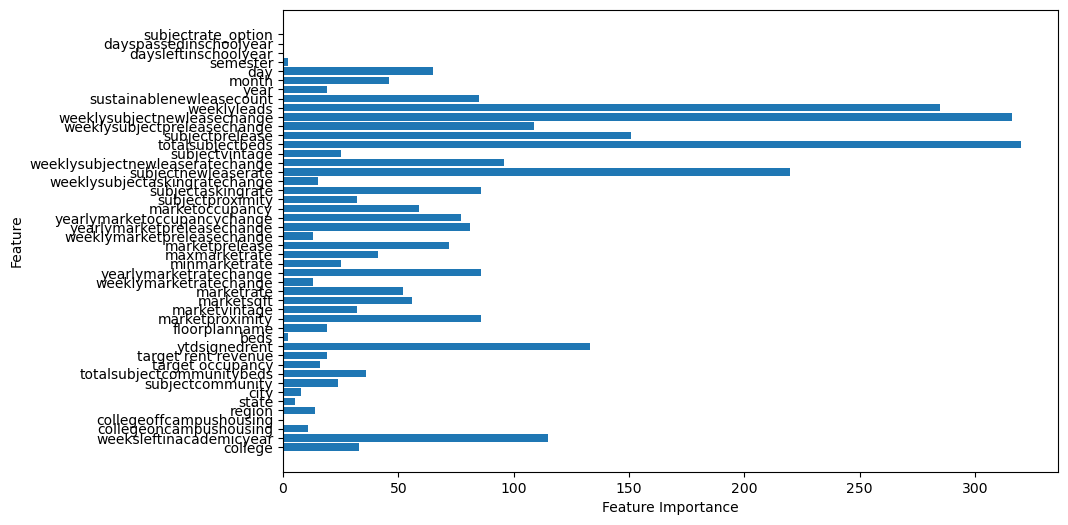

In [22]:
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Visualize feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances)
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5068
[LightGBM] [Info] Number of data points in the train set: 86508, number of used features: 44
[LightGBM] [Info] Start training from score 83.938329
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6090
[LightGBM] [Info] Number of data points in the train set: 173017, number of used features: 46
[LightGBM] [Info] Start training from score 63.393308
[LightGBM] [Warning] Foun

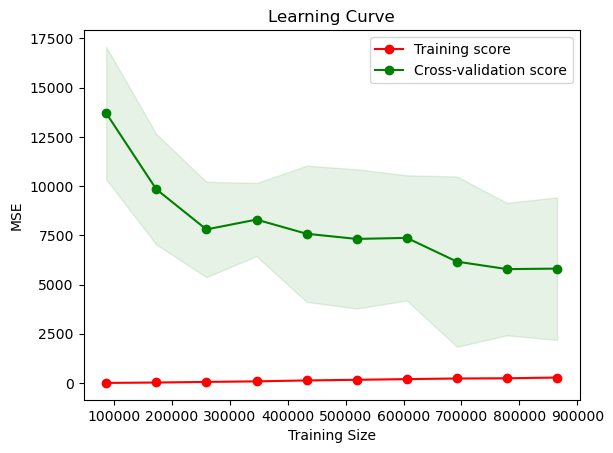

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error', cv=5
)

# Calculate mean and standard deviation for train and validation sets
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
validation_mean = -validation_scores.mean(axis=1)
validation_std = validation_scores.std(axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.show()

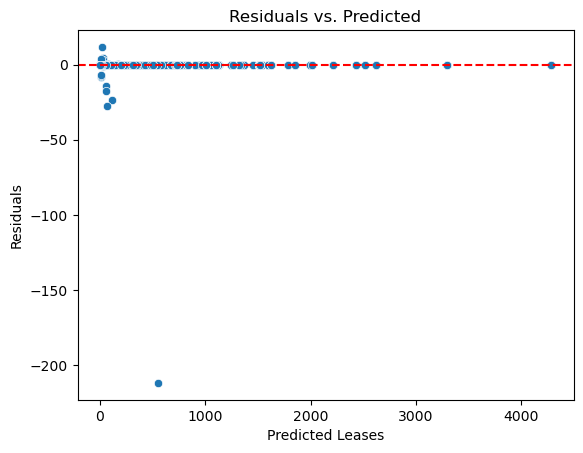

In [24]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Leases')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.0016507453576977134


In [26]:
# Example: Comparing against a simple average-based model
average_lease = y_train.mean()
baseline_pred = [average_lease for _ in range(len(y_test))]
baseline_mse = mean_squared_error(y_test, baseline_pred)
print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 16124.666761524482
